### 그리디 알고리즘

- 현재 상황에서 지금 당장 좋은 것만 고르는 방법
- 그리디 알고리즘은 최적의 해를 보장할 수 없을 때가 많다.
- 그리디 문제는 탐욕법으로 얻은 해가 최적의 해가 되는 상황에서, 이를 추론할 수 있게 풀리도록 출제된다.

### 거스름 돈 : 문제 설명

- 당신은 음식점의 계산을 도와주는 점원입니다. 카운터에는 거스름돈으로 사용할 500원, 100원, 50원, 10원짜리 동전이 무한히 존재한다고 가정합니다.   
손님에게 거슬러 주어야 할 돈이 N원일 때 거슬러 주어야 할 동전의 최소 개수를 구하세요. (단, 거슬러 줘야 할 돈 N은 항상 10배수)

[단계 0] - 남은 돈 : 1,260원   

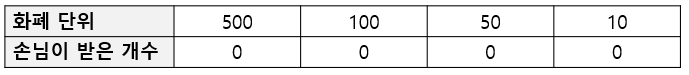

[단계 1] 남은 돈 : 260원    
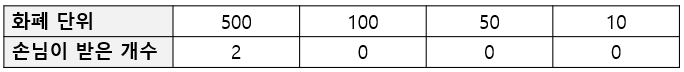

[단계 2] 남은 돈 : 60원    
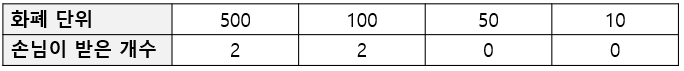

[단계 3] 남은 돈 : 10원   
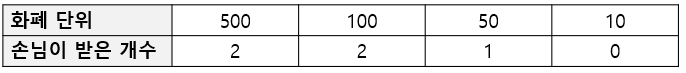

[단계 4] 남은 돈 : 0원   
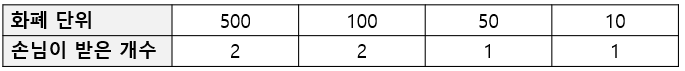

### 거스름 돈 : 정당성 분석   
- 가장 큰 화폐 단위부터 돈을 거슬러 주는 것이 최적의 해를 보장하는 이유는 무엇인가?   
    - 큰 단위가 항상 작은 단위의 배수이므로 작은 단위의 동전들을 종합해 다른 해가 나올 수 없기 때문이다.   
- 만약에 800원을 거슬러 줘야 하는데 화폐 단위가 500원, 400원, 100원이라면 어떻게 될것인가?   
- 최소한의 아이디어를 떠올리고 이것이 정당한지 검토 할 수 있어야 한다.

In [ ]:
#Python 

n = 1260
cnt = 0

#큰 단위의 화폐부터 차례대로 확인
array = [500, 100, 50, 10]

for coin in array:
    cnt += n // coin # 거슬러 줄 수 있는 동전의 개수 카운트
    n %= coin

print(cnt)

In [ ]:
#C++

#include <bits/stdc++.h>

using namespace std;

int n = 1260;
int cnt;

int coinTypes[4] = {500, 100, 50, 10};

int main(void){
    for (int i = 0; i < 4; i++){
        cnt += n / coinTypes[i];
        n %= coinTypes[i];
    }
    cout << cnt << 'n';
}

#C++ 컴파일은 Dev C를 활용한다.

### 거스름돈 : 시간 복잡도 분석   
- 화폐의 종류가 K라고 할 때, 소스코드의 시간 복잡도는 $O(K)$입니다.
- 이 알고리즘의 시간 복잡도는 거슬러줘야 하는 금액과 무관하며, 동전의 총 종류에만 영향을 받는다.

---

### 1이 될 때 까지: 문제 설명   
- 어떠한 수 N이 1이 될 때까지 다음의 두 과정 중 하나를 반복적으로 선택하여 수행하려고 합니다.   
　단, 두번째 연산은 N이 K로 나누어 떨어질때만 선택할 수 있다.
1. N에서 1을 뺀다.
2. N을 K로 나눈다.   
- 예를 들어 N이 17, K가 4라고 가정하자. 이때 1번의 과정을 한 번 수행하면 N은 16이 된다.   
이후에 2번의 과정을 수행하면 N은 1이 된다.   
- 결과적으로 이 경우 전체 과정을 실행한 횟수는 3이 된다.(이것은 N을 1로 만드는 최소 횟수다.)   
- N과 K가 주어질 때 N이 1이 될 때까지 1번 혹은 2번의 과정을 수행해야 하는 최소 횟수를 구하는 프로그램을 작성하라.

입력 조건
- 첫 줄에 N (1<= N <= 100,000) 과 K (2 <= K <= 100,000)가 공백을 기준으로 하여 각각 자연수로 주어진다.
출력 조건   
- 첫 줄에 N이 1이 될 때까지 1번 혹은 2번의 과정을 수행해야 하는 횟수의 최솟값을 출력한다.   

입력 예시 : 25 5   
출력 예시 : 2

### 1이 될 때 까지 : 문제 해결 아이디어  
- 주어진 N에 대하여 최대한 많이 나누기를 수행하면 된다.
- N의 값을 줄일 때 2 이상의 수로 나누는 작업이 1을 빼는 작업보다 수를 훨씬 많이 줄일 수 있다.
- 예를 들어 N = 25, K = 3일 때는 다음과 같다.   

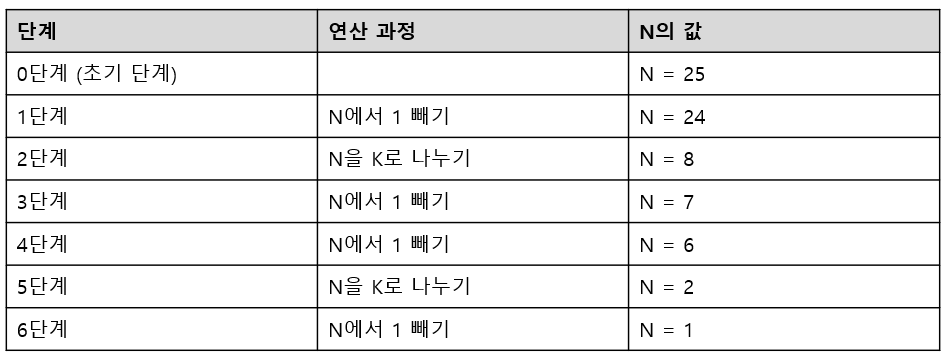

### 1이 될 때 까지 : 정당성 분석   
- 가능하면 최대한 많이 나누는 작업이 최적의 해를 항상 보장 할 수 있는가?
- N이 아무리 큰 수여도, K로 계속 나눈다면 기하급수적으로 빠르게 줄일 수 있다.
- 다시 말해 K가 2 이상이기만 하면, K로 나누는 것이 1을 빼는 것보다 항상 빠르게 N을 줄일 수 있다.
    - 또한 N은 항상 1에 도달하게 된다. (최적의 해 성립)

### 1이 될 때까지 답안 예시

In [5]:
n, k = map(int, input().split()) # n, k 공백 기준으로 구분하여 입력 받기

result = 0

while True:
    target = (n//k) * k #N 이 K로 나누어 떨어지는 수가 될 때까지 빼기
    result += (n-target)
    n = target

    if n < k: #n이 k보다 작을 때 (더이상 나눌 수 없을때) 끝
        break
    result += 1
    n //= k

result += (n -1) #남은 수에 대하여 1씩 빼기
print(result)

3


---

### 곱하기 혹은 더하기 문제 

- 각 자리가 숫자 (0부터 9)로만 이루어진 문자열 S가 주어졌을 때, 왼쪽부터 오른쪽으로 하나씩 모든 숫자를 확인하며 숫자 사이에   
 'x' 혹은 '+' 연산자를 넣어 결과적으로 만들어질 수 있는 가장 큰 수를 구하는 프로그램을 작성하세요. 단, +보다 x를 먼저 계산하는   
  일반적인 방식과는 달리, 모든 연산은 왼쪽부터 순서대로 이루어진다고 가정한다.

- 예를 들어 02984라는 문자열로 만들 수 있는 가장 큰 수는 ((((0 + 2) x 9) x 8) x 4) = 576 입니다. 또한 만들어질 수 있는    
 가장 큰 수는 항상 20억 이하의 정수가 되도록 입력이 주어집니다.

입력 조건 : 첫줄에 여러 개의 숫자로 구성된 하나의 문자열 S가 주어진다. (1 ≤ S의 길이 ≤ 20)   
출력 조건 : 첫줄에 만들어질 수 있는 가장 큰 수를 출력한다.

### 문제 해결 아이디어

- 대부분의 경우 '+' 보다는 'x'가 더 값을 크게 만든다.
    - 예를 들어 5 + 6 = 11이고, 5 x 6 = 30이다.
- 다만 두 수 중에서 하나라도 '0' 혹은 '1'인 경우, 곱하기보다는 더하기를 수행하는 것이 효율적이다.
- 따라서 두 수에 대하여 연산을 수행할 때, 두 수 중에서 하나라도 1 이하인 경우에는 더하며, 두 수가 모두 2 이상인 경우에는 곱하면 정답이다.

### 곱하기 혹은 더하기 문제 답안 예시

In [7]:
data = input()

result = int(data[0])  # 첫 문자를 숫자로 변경하여 대입한다.

for i in range(1, len(data)):
    num = int(data[i])
    if num <= 1 or result <= 1:  #두 수 중에서 하나라도 '0' 혹은 '1'인 경우 더하기 수행
        result += num
    else:
        result *= num

print(result)

1


---

### 모험가 길드 문제

- 마을에 모험가 N명이 존재한다. 모험가 길드에서는 N명의 모험가를 대상으로 '공포도'를 측정했는데,   
'공포도'가 높은 모험가는 쉽게 공포를 느껴 위험 상황에서 제대로 대처할 능력이 떨어진다.
- 모험가 길드장이 모험가 그룹을 안전하게 구성하고자 공포도가 X인 모험가는 반드시 X명 이상으로   
구성한 모험가 그룹에 참여해야 여행을 떠날 수 있도록 규정했다.
- 길드장은 최대 몇 개의 모험가 그룹을 만들 수 있는지 궁금하다, N명의 모험가에 대한 정보가 주어졌   
을때, 여행을 떠날 수 있는 그룹 수의 최댓값을 구하는 프로그램을 작성하세요.

### 문제 설명

- 예를 들어 N = 5 이고, 각 모험가의 공포도가 다음과 같다고 가정한다.
모험가 공포도 = ' 2 3 1 2 2'   
- 이 경우 그룹 1에 공포도가 1,2,3 인 모험가를 한 명씩 넣고, 그룹 2에 공포도가 2인 남은 두명을 넣게   
되면 총 2개의 그룹을 만들 수 있다.
- 또한 몇 명의 모험가는 마을에 그대로 남아 있어도 되기 때문에, 모든 모험가를 특정한 그룹에 넣을 필요는    
없다.

### 문제 조건
입력조건
- 첫 줄에 모험가의 수 N이 주어진다 (1 ≤ N ≤ 100,000)
- 둘째 줄에 각 모험가의 공포도 값을 N 이하의 자연수로 주어지며, 각 자연수는 공백으로 구분한다.     
       
출력조건
- 여행을 떠날 수 있는 그룹 수의 최대값을 출력한다.

In [ ]:
n = int(input())
data = list(map(int, input().split())) #.split() : 공백에 상광넚이 무조건 1개로 본다.
data.sort() # 오름차순 정렬

cnt = 0 # 현재 그룹에 포함된 모험가 수
result = 0 # 총 그룹 수 

for i in data: # 공포도 낮은거부터 확인
    cnt += 1 # 현재 그룹에 확인중인 모험가 포함시키기
    if cnt > i: # 그룹에 포함된 모험가의 수가 현재 공포도보다 크다면, 그룹 생성
        result += 1
        cnt = 0

print(result)